## Importações

In [1]:
%matplotlib inline

import sys
import lumapi
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.constants import c


C:\Program Files\Lumerical\v221\api\python\lumapi.py:796: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [2]:
inter = lumapi.INTERCONNECT()

In [3]:
um = 1e-6
nm = 1e-9

# 1nm, 10nm, 20nm, 6.67nm
Lr_ideal = np.array([553.97536458,  55.39753646,  27.69876823, 83.1901389522])*um


In [4]:
# 1nm, 10nm, 20nm, 6.67nm
Lr_pdk = np.array([581.8559265358,  64.8959265,  27.69876823, 93.95592653])*um

raio = 5*um

Lc_central = 3.97*um
Lc_superior = 9.93*um 
Lc_inferior = 14.37*um

comprimento_DC_1 = 2*np.pi*raio + Lc_superior + Lc_central
comprimento_DC_2 = 2*np.pi*raio + Lc_inferior + Lc_central

Lc = 9*um

comprimento_DC = 2*np.pi*raio + Lc + Lc
comprimentos_guias_pdk = Lr_pdk - comprimento_DC
print(comprimentos_guias_pdk/2)

[ 2.66220000e-04  7.73999998e-06 -1.08585792e-05  2.22700000e-05]


## Criação e posicionamento dos blocos

In [5]:
inter.switchtodesign()
inter.deleteall()

inter.addelement('Optical Network Analyzer')
inter.set("number of points",50000)
inter.set("number of input ports",2)
inter.set("input parameter",2)
inter.set("start frequency", c/(1500*nm))
inter.set("stop frequency", c/(1600*nm))

# 1 - ideal
# 2 - real
# 3 - pdk
caso = 3
CASO = ["IDEAL", "REAL", "PDK"]
CASO = CASO[caso-1]

#indice 0 1um
#indice 1 10um
#indice 2 20um
FSR = [1, 10, 20]

indice = 2
comprimentos_guias_ideal = (Lr_ideal[indice])/2

#comprimentos_guias_real = (Lr[indice] - 83.5918)/2

comprimentos_guias_pdk = (Lr_pdk[indice] - comprimento_DC)/2
comprimentos_guias_pdk_superior = (Lr_pdk[3] - comprimento_DC_1)/2
comprimentos_guias_pdk_inferior = (Lr_pdk[1] - comprimento_DC_2)/2

FSR = FSR[indice]

if (caso == 1):
    inter.addelement('Waveguide Coupler')
    inter.set("coupling coefficient 1", 0.2)
    inter.set("name", "DC1")

    inter.select("DC1")
    inter.copy()
    inter.set("name","DC2")

    inter.addelement('Straight waveguide')
    inter.set("name", "Guia_1")
    inter.set("length",comprimentos_guias_ideal)
    inter.set("effective index 1", 2.35400)
    inter.set("group index 1", 4.33683)
    inter.rotateelement("Guia_1")

    inter.select("Guia_1")
    inter.copy()
    inter.set("name","Guia_2")

elif (caso == 2):
    inter.addelement("Optical N Port S-Parameter")
    inter.set("name", "DC1")
    inter.set("load from file", 1)
    inter.set("s parameters filename", r"C:\Users\gson5\Downloads\Photonics-API-lumapi\LAB. 11 - RING\JUPYTER\TE.dat")

    inter.select("DC1")
    inter.copy()
    inter.set("name","DC2")

    inter.rotateelement("DC1")
    inter.rotateelement("DC1")

    inter.addelement("MODE Waveguide")
    inter.set("name", "Guia_1")
    inter.set("ldf filename", r"C:\Users\gson5\Downloads\Photonics-API-lumapi\LAB. 11 - RING\JUPYTER\GUIA.ldf")
    inter.set("length", comprimentos_guias_real*um)
    inter.rotateelement("Guia_1")

    inter.select("Guia_1")
    inter.copy()
    inter.set("name","Guia_2")
elif (caso == 3):
    if(FSR == 10 or FSR == 1):
        inter.expressioncheckoff()
        inter.addelement("ebeam_dc_te1550")
        inter.set("coupling_length", Lc)
        inter.set("name", "DC1")

        inter.select("DC1")
        inter.copy()
        inter.set("name","DC2")
        inter.rotateelement("DC1")
        inter.rotateelement("DC1")

        inter.addelement('ebeam_wg_integral_1550')
        inter.set("name", "Guia_1")
        inter.set("wg_length", comprimentos_guias_pdk)
        inter.rotateelement("Guia_1")

        inter.addelement('ebeam_wg_integral_1550')
        inter.set("name", "Guia_2")
        inter.set("wg_length", comprimentos_guias_pdk)
        inter.rotateelement("Guia_2")
    elif(FSR == 20):
        #22.27um e 7.74um

        inter.expressioncheckoff()
        inter.addelement("ebeam_dc_te1550")
        inter.set("coupling_length", Lc_central)
        inter.set("name", "DC1")

        inter.select("DC1")
        inter.copy()
        inter.set("name","DC2")
        inter.set("coupling_length", Lc_inferior)

        inter.rotateelement("DC1")
        inter.rotateelement("DC1")

        inter.select("DC1")
        inter.copy()
        inter.set("name","DC4")
        inter.set("coupling_length", Lc_superior)

        inter.addelement('ebeam_wg_integral_1550')
        inter.set("name", "Guia_1")
        inter.set("wg_length", comprimentos_guias_pdk_inferior)
        inter.rotateelement("Guia_1")

        inter.addelement('ebeam_wg_integral_1550')
        inter.set("name", "Guia_2")
        inter.set("wg_length", comprimentos_guias_pdk_inferior)
        inter.rotateelement("Guia_2")
 
        inter.addelement('ebeam_wg_integral_1550')
        inter.set("name", "Guia_3")
        inter.set("wg_length", comprimentos_guias_pdk_superior)
        inter.rotateelement("Guia_3")

        inter.addelement('ebeam_wg_integral_1550')
        inter.set("name", "Guia_4")
        inter.set("wg_length", comprimentos_guias_pdk_superior)
        inter.rotateelement("Guia_4")

        inter.setposition("DC4", 0, -175)
        inter.setposition("Guia_3", 220, -75)
        inter.setposition("Guia_4", -220, -75)

inter.setposition("ONA_1",-220,-270)
inter.setposition("DC1",0,175)
inter.setposition("DC2",0,175*3)
inter.setposition("Guia_1",220,175*2)
inter.setposition("Guia_2",-220,175*2)


## Conexão dos blocos

In [6]:
if(caso == 1):
    inter.connect("DC1", "port 4", "Guia_1", "port 1")
    inter.connect("DC1", "port 2", "Guia_2", "port 1")
    inter.connect("Guia_1", "port 2", "DC2", "port 3")
    inter.connect("Guia_2", "port 2", "DC2", "port 1")
    inter.connect("ONA_1", "output", "DC2", "port 2")
    inter.connect("ONA_1", "input 1", "DC2", "port 4")
    inter.connect("ONA_1", "input 2", "DC1", "port 1")

elif(caso == 2):
    inter.connect("DC1", "port1", "Guia_1", "port 1")
    inter.connect("DC1", "port2", "Guia_2", "port 1")
    inter.connect("Guia_1", "port 2", "DC2", "port2")
    inter.connect("Guia_2", "port 2", "DC2", "port1")
    inter.connect("ONA_1", "output", "DC2", "port3")
    inter.connect("ONA_1", "input 1", "DC2", "port4")
    inter.connect("ONA_1", "input 2", "DC1", "port4")
elif(caso == 3):
    if(FSR == 1 or FSR == 10):
        inter.connect("DC1", "opt_3", "Guia_2", "port 1")
        inter.connect("DC1", "opt_1", "Guia_1", "port 1")
        inter.connect("Guia_1", "port 2", "DC2", "opt_3")
        inter.connect("Guia_2", "port 2", "DC2", "opt_1")
        inter.connect("ONA_1", "output", "DC2", "opt_2")
        inter.connect("ONA_1", "input 1", "DC2", "opt_4")
        inter.connect("ONA_1", "input 2", "DC1", "opt_4")   
    if(FSR ==20):
        inter.connect("DC1", "opt_3", "Guia_2", "port 1")
        inter.connect("DC1", "opt_1", "Guia_1", "port 1")
        inter.connect("Guia_1", "port 2", "DC2", "opt_3")
        inter.connect("Guia_2", "port 2", "DC2", "opt_1")
        inter.connect("DC1", "opt_4", "Guia_4", "port 2")
        inter.connect("DC1", "opt_2", "Guia_3", "port 2")
        inter.connect("DC4", "opt_1", "Guia_3", "port 1")
        inter.connect("DC4", "opt_3", "Guia_4", "port 1")

        inter.connect("ONA_1", "output", "DC2", "opt_2")
        inter.connect("ONA_1", "input 1", "DC2", "opt_4")
        inter.connect("ONA_1", "input 2", "DC4", "opt_2")

In [7]:
inter.run()

## Obtenção de resultados

In [8]:
if (caso == 1):
    TE_gain_1 = np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")['TE gain (dB)'])
    TE_gain_2 = np.squeeze(inter.getresult("ONA_1","input 2/mode 1/gain")['TE gain (dB)'])
    
    FSR1 = inter.getresult("ONA_1","input 1/mode 1/peak/free spectral range")
    fsr_wv1= np.squeeze(FSR1['wavelength'])
    FSR1 = FSR1["TE free spectral range (m)"]

    FSR2 = inter.getresult("ONA_1","input 2/mode 1/peak/free spectral range")
    fsr_wv2= np.squeeze(FSR2['wavelength'])
    FSR2 = FSR2["TE free spectral range (m)"]

elif (caso == 2):
    TE_gain_1 = np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")['mode 1 gain (dB)'])
    TE_gain_2 = np.squeeze(inter.getresult("ONA_1","input 2/mode 1/gain")['mode 1 gain (dB)'])

    FSR1 = inter.getresult("ONA_1","input 1/mode 1/peak/free spectral range")
    fsr_wv1= np.squeeze(FSR1['wavelength'])
    FSR1 = FSR1["mode 1 free spectral range (m)"]

    FSR2 = inter.getresult("ONA_1","input 2/mode 1/peak/free spectral range")
    fsr_wv2= np.squeeze(FSR2['wavelength'])
    FSR2 = FSR2["mode 1 free spectral range (m)"]
    
elif (caso == 3):
    TE_gain_1 = np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")["'TE' gain (dB)"])
    TE_gain_2 = np.squeeze(inter.getresult("ONA_1","input 2/mode 1/gain")["'TE' gain (dB)"])

    FSR1 = inter.getresult("ONA_1","input 1/mode 1/peak/free spectral range")
    fsr_wv1= np.squeeze(FSR1['wavelength'])
    FSR1 = FSR1["'TE' free spectral range (m)"]

    FSR2 = inter.getresult("ONA_1","input 2/mode 1/peak/free spectral range")
    fsr_wv2= np.squeeze(FSR2['wavelength'])
    FSR2 = FSR2["'TE' free spectral range (m)"]

comprimentos_de_onda1 = np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")['wavelength'])
comprimentos_de_onda2 = np.squeeze(inter.getresult("ONA_1","input 2/mode 1/gain")['wavelength'])

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\gson5\AppData\Local\Temp\ipykernel_24428\3655205665.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)


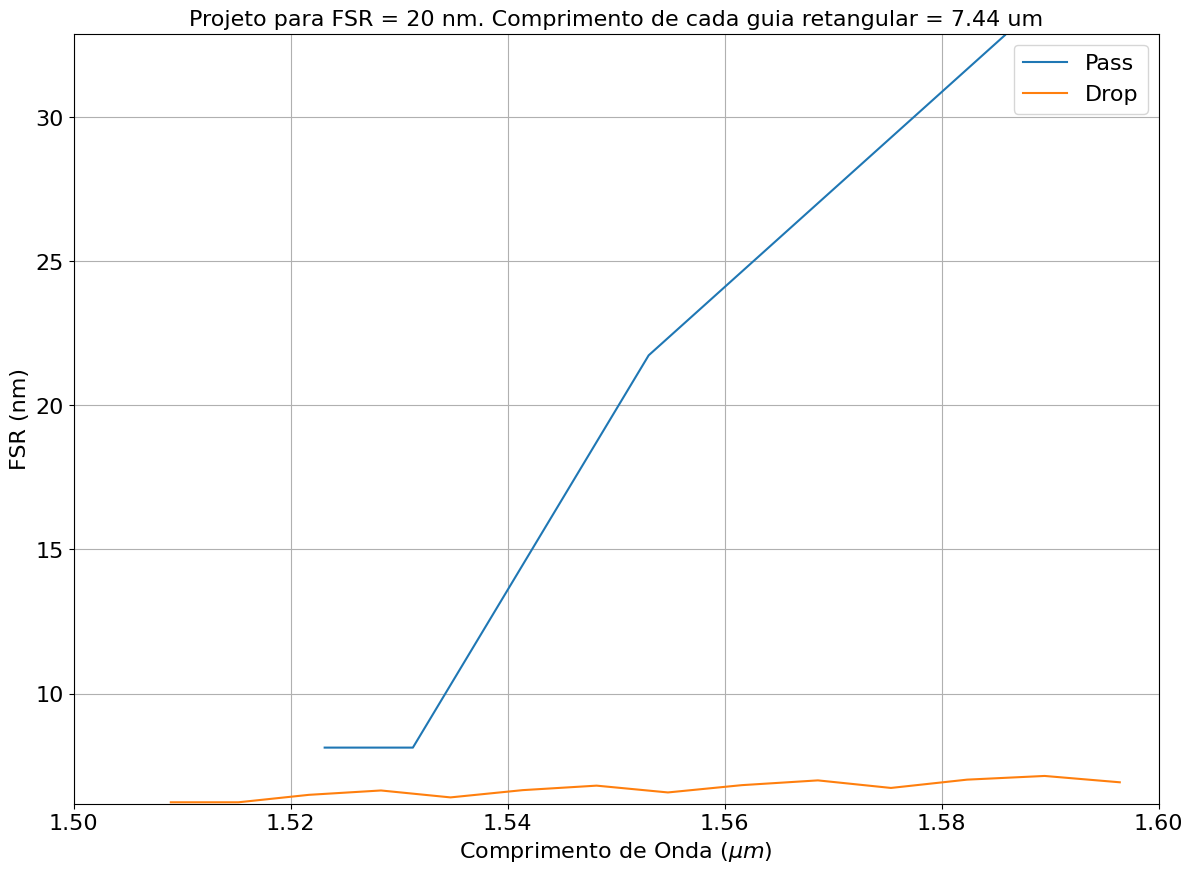

In [9]:
plt.figure(figsize=(14,10))

plt.plot(fsr_wv1*1e6,FSR1*1e9, label = "Pass")
plt.plot(fsr_wv2*1e6,FSR2*1e9, label = "Drop")

plt.xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)
plt.ylabel('FSR (nm)', fontsize = 16)
plt.title(f"Projeto para FSR = {FSR} nm. Comprimento de cada guia retangular = 7.44 um", fontsize = 16)

plt.tick_params(axis='both', labelsize=16)

plt.xlim(1.5,1.6)
plt.ylim(min(FSR2*1e9 - 0.05) ,max(FSR1*1e9 + 0.05))

plt.legend(loc = "best", fontsize = 16)

plt.grid(True)

plt.savefig(f'C:/Users/gson5/Downloads/Photonics-API-lumapi/LAB. 11 - RING/RESULTADOS/FSR {FSR} nm {CASO}.png')
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\gson5\AppData\Local\Temp\ipykernel_24428\3496045412.py:9: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)


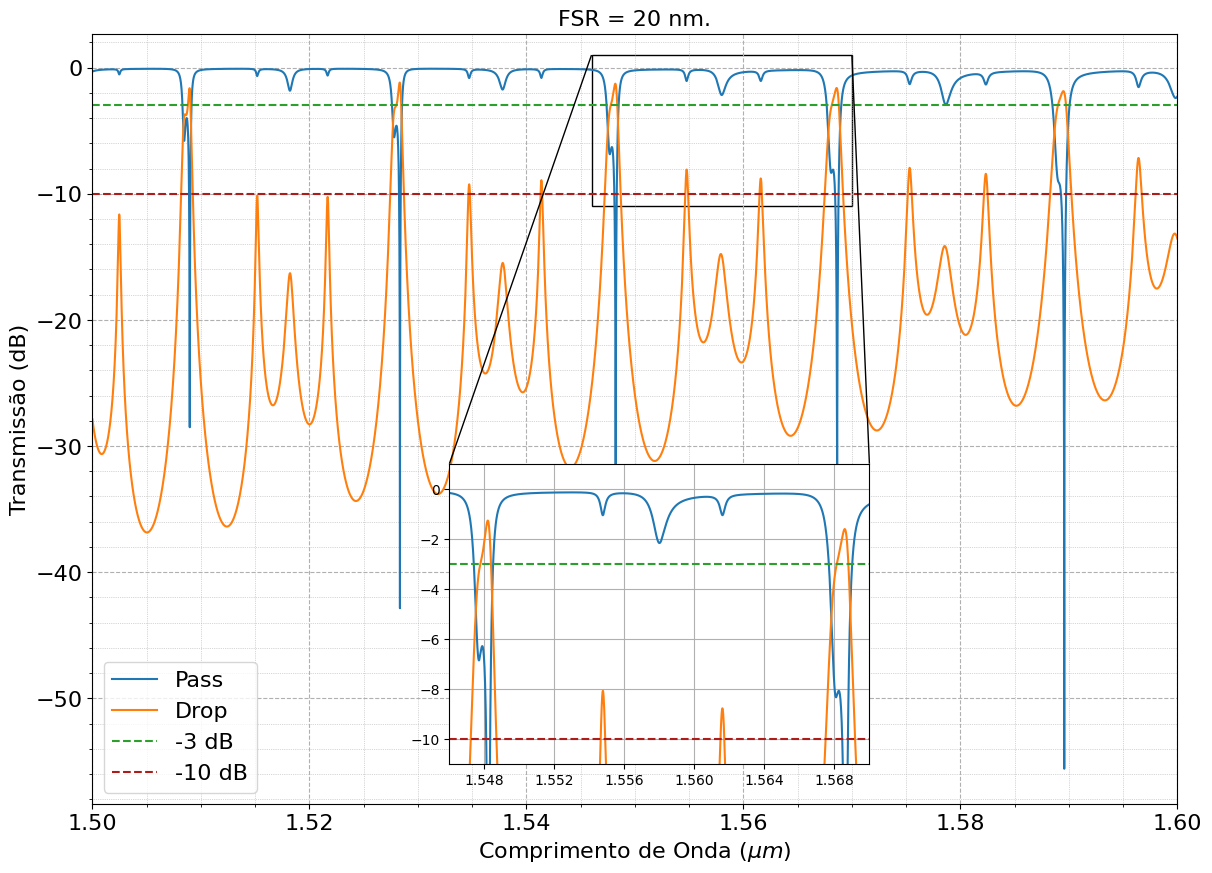

In [10]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(comprimentos_de_onda1*1e6,TE_gain_1, label = "Pass")
ax.plot(comprimentos_de_onda2*1e6,TE_gain_2, label = "Drop")
ax.set_xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)
ax.set_ylabel('Transmissão (dB)', fontsize = 16)
ax.set_title(f'FSR = {FSR} nm.', fontsize = 16)

ax.axhline(y=-3, linestyle='--', color = '#2ca02c', label = '-3 dB')
ax.axhline(y=-10, linestyle='--', color = '#ad1c19', label = '-10 dB')

ax.tick_params(axis='both', labelsize=16)

ax.set_xlim(1.5,1.6)
ax.legend(loc = "best", fontsize = 16)

plt.grid(True, which='major', linestyle='--', linewidth=0.8)  # Grade principal
plt.minorticks_on()  # Ativa as grades menores
plt.grid(True, which='minor', linestyle=':', linewidth=0.5)  # Grade secundária

plt.grid(True)

zoom = plt.axes([0.38, 0.15, 0.3, 0.3])  # [x, y, largura, altura] em coordenadas relativas (0 a 1)
zoom.plot(comprimentos_de_onda1*1e6, TE_gain_1)
zoom.plot(comprimentos_de_onda2*1e6, TE_gain_2)
zoom.axhline(y=-3, linestyle='--', color = '#2ca02c', label = '-3 dB')
zoom.axhline(y=-10, linestyle='--', color = '#ad1c19', label = '-10 dB')
zoom.set_xlim(1.546, 1.57)  # Define a região de zoom no eixo x
zoom.set_ylim(-11, 1)  # Define a região de zoom no eixo y
# Ajusta a quantidade de divisões no grid do gráfico principal
zoom.xaxis.set_major_locator(MaxNLocator(8))  # No máximo 6 divisões no eixo x
zoom.yaxis.set_major_locator(MaxNLocator(6))  # No máximo 6 divisões no eixo y
mark_inset(ax, zoom, loc1=1, loc2=2, fc="none", ec="black")

plt.grid(True)

plt.savefig(f'C:/Users/gson5/Downloads/Photonics-API-lumapi/LAB. 11 - RING/RESULTADOS/TRANSMISSÃO FSR {FSR} nm {CASO}.png')
plt.show()


In [11]:
#inter.close()

## As linhas de código abaixo realiza a variação dos guias retangulares para tentar aproximar para a FSR desejada

In [12]:
condicao = False

if (condicao):
    L_guia = np.linspace(21.28*um, 23.51*um, 10)
    TE_gain_1 = []
    TE_gain_2 = []
    FSR1 =[]
    FSR2 =[]
    fsr_wv1 =[]
    fsr_wv2 = []
    comprimentos_de_onda1 = []
    comprimentos_de_onda2 = []
    comprimento_total =[]

    for i in range(len(L_guia)):

        comprimento_total.append(L_guia[i]*2 + comprimento_DC)
        
        inter.switchtodesign()
        inter.deleteall()

        inter.addelement('Optical Network Analyzer')
        inter.set("number of points",50000)
        inter.set("number of input ports",2)
        inter.set("input parameter",2)
        inter.set("start frequency", c/(1500*nm))
        inter.set("stop frequency", c/(1600*nm))
        inter.expressioncheckoff()
        inter.addelement("ebeam_dc_te1550")
        inter.set("coupling_length", Lc)
        inter.set("name", "DC1")

        inter.select("DC1")
        inter.copy()
        inter.set("name","DC2")
        inter.rotateelement("DC1")
        inter.rotateelement("DC1")

        inter.addelement('ebeam_wg_integral_1550')
        inter.set("name", "Guia_1")
        inter.set("wg_length", L_guia[i])
        inter.rotateelement("Guia_1")

        inter.addelement('ebeam_wg_integral_1550')
        inter.set("name", "Guia_2")
        inter.set("wg_length", L_guia[i])
        inter.rotateelement("Guia_2")

        inter.setposition("ONA_1",-220,-270)
        inter.setposition("DC1",0,175)
        inter.setposition("DC2",0,175*3)
        inter.setposition("Guia_1",220,175*2)
        inter.setposition("Guia_2",-220,175*2)

        inter.connect("DC1", "opt_3", "Guia_2", "port 1")
        inter.connect("DC1", "opt_1", "Guia_1", "port 1")
        inter.connect("Guia_1", "port 2", "DC2", "opt_3")
        inter.connect("Guia_2", "port 2", "DC2", "opt_1")
        inter.connect("ONA_1", "output", "DC2", "opt_2")
        inter.connect("ONA_1", "input 1", "DC2", "opt_4")
        inter.connect("ONA_1", "input 2", "DC1", "opt_4")   

        inter.run()
    
        TE_gain_1.append(np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")["'TE' gain (dB)"]))
        TE_gain_2.append(np.squeeze(inter.getresult("ONA_1","input 2/mode 1/gain")["'TE' gain (dB)"]))

        FSR1_aux = inter.getresult("ONA_1","input 1/mode 1/peak/free spectral range")
        fsr_wv1.append(np.squeeze(FSR1_aux['wavelength']))
        FSR1.append(FSR1_aux["'TE' free spectral range (m)"])

        FSR2_aux =inter.getresult("ONA_1","input 2/mode 1/peak/free spectral range")
        fsr_wv2.append(np.squeeze(FSR2_aux['wavelength']))
        FSR2.append(FSR2_aux["'TE' free spectral range (m)"])

        comprimentos_de_onda1 = np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")['wavelength'])
        comprimentos_de_onda2 = np.squeeze(inter.getresult("ONA_1","input 2/mode 1/gain")['wavelength'])

In [13]:
if(condicao):
    for i in range(len(L_guia)):
        plt.figure(figsize=(14,10))

        plt.plot(fsr_wv1[i]*1e6,FSR1[i]*1e9, label = f"Pass, L Individual = {L_guia[i]*1e6:.2f} um")
        plt.plot(fsr_wv2[i]*1e6,FSR2[i]*1e9, label = f"Drop, L Individual = {L_guia[i]*1e6:.2f} um")
        plt.xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)
        plt.ylabel('FSR (nm)', fontsize = 16)
        plt.title(f"Projeto para FSR = 1 nm. Lr = {comprimento_total[i]*1e6:.2f} um", fontsize = 16)

        plt.tick_params(axis='both', labelsize=16)

        plt.xlim(1.5,1.6)
        plt.ylim(min(FSR1[i]*1e9 - 0.05) ,max(FSR2[i]*1e9 + 0.05))

        plt.legend(loc = "best", fontsize = 16)

        plt.grid(True)

        #plt.savefig(f'C:/Users/gson5/Downloads/Photonics-API-lumapi/LAB. 11 - RING/RESULTADOS/FSR 1 nm PDK.png')
        plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\gson5\AppData\Local\Temp\ipykernel_24428\665400964.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Comprimento de Onda $(\mu m)$', fontsize = 16)
